In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_csv("Algerian_forest_fires_dataset.csv",header=1)

In [3]:
data.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


## Data Cleaning

In [5]:
data.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
dtype: int64

In [6]:
data[data.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


### Add new column with Region (contains two Regions in a data) 

In [7]:
data.loc[:122,"Region"]=0
data.loc[122:, "Region"]=1

In [8]:
data.head(5)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0.0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0.0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0.0


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          246 non-null    object 
 1   month        245 non-null    object 
 2   year         245 non-null    object 
 3   Temperature  245 non-null    object 
 4    RH          245 non-null    object 
 5    Ws          245 non-null    object 
 6   Rain         245 non-null    object 
 7   FFMC         245 non-null    object 
 8   DMC          245 non-null    object 
 9   DC           245 non-null    object 
 10  ISI          245 non-null    object 
 11  BUI          245 non-null    object 
 12  FWI          245 non-null    object 
 13  Classes      244 non-null    object 
 14  Region       246 non-null    float64
dtypes: float64(1), object(14)
memory usage: 29.0+ KB


In [10]:
data['Region']=data['Region'].astype('int')

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
 14  Region       246 non-null    int64 
dtypes: int64(1), object(14)
memory usage: 29.0+ KB


In [12]:
data.tail(5)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,1
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,1
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1
245,30,09,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,not fire,1


In [13]:
data.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
Region         0
dtype: int64

### Removing null value column

In [14]:

data=data.dropna().reset_index(drop=True)

In [15]:
data.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [16]:
data.iloc[[122]]  

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,1


In [17]:
data=data.drop(122).reset_index(drop=True)

In [18]:
data.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,1


In [19]:
data.columns  # having some extra spaces in column names

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

### Fixes spaces & Column names

In [20]:
data.columns=data.columns.str.strip()
data.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    object
 1   month        243 non-null    object
 2   year         243 non-null    object
 3   Temperature  243 non-null    object
 4   RH           243 non-null    object
 5   Ws           243 non-null    object
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
 14  Region       243 non-null    int64 
dtypes: int64(1), object(14)
memory usage: 28.6+ KB


### Changing required columns to integer data type

In [22]:
data[['day', 'month', 'year', 'Temperature', 'RH', 'Ws']]=data[['day', 'month', 'year', 'Temperature', 'RH', 'Ws']].astype('int')

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    int64 
 1   month        243 non-null    int64 
 2   year         243 non-null    int64 
 3   Temperature  243 non-null    int64 
 4   RH           243 non-null    int64 
 5   Ws           243 non-null    int64 
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
 14  Region       243 non-null    int64 
dtypes: int64(7), object(8)
memory usage: 28.6+ KB


In [24]:
data.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [25]:
data[['Rain', 'FFMC','DMC', 'DC', 'ISI', 'BUI', 'FWI']]=data[['Rain', 'FFMC','DMC', 'DC', 'ISI', 'BUI', 'FWI']].astype('float')

In [26]:
# Another Way

# objects=[features for features in data.columns if data[features].dtypes!=="O"]

In [27]:
"""
for i in objects:
    if i!='Classes':
        data[i]=data[i].astype('float')

"""



"\nfor i in objects:\n    if i!='Classes':\n        data[i]=data[i].astype('float')\n\n"

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


In [29]:
data.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,0.497942
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,0.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,0.000000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


### Saving Cleaned Dataset

In [30]:
data.to_csv('Cleaned_Dataset.csv',index=0)

## Exploratory Data Analysis

In [31]:
data_copy=data.drop(columns=['day', 'month', 'year'],axis=1)

In [32]:
data_copy

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [33]:
data['Classes'].value_counts()

fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: Classes, dtype: int64

In [34]:
data['Classes']=data['Classes'].str.strip()

In [35]:
data['Classes'].value_counts()

fire        137
not fire    106
Name: Classes, dtype: int64

In [36]:
#data_copy['Classes']=data_copy['Classes'].replace(to_replace=['not fire','fire'], value=[0,1])
#data_copy['Classes']=data_copy['Classes'].replace({'not fire':0, 'fire':1})

In [37]:
data_copy['Classes']=np.where(data_copy['Classes'].str.contains('not fire'),0,1)

In [38]:
data_copy.tail()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1
242,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,0,1


In [39]:
data_copy['Classes'].value_counts()

1    137
0    106
Name: Classes, dtype: int64

## Visualization

In [40]:
plt.style.use('seaborn')

/var/folders/rc/76flhrzn4pgf33r81dt4lky00000gn/T/ipykernel_2022/240305066.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


array([[<Axes: title={'center': 'Temperature'}>,
        <Axes: title={'center': 'RH'}>, <Axes: title={'center': 'Ws'}>],
       [<Axes: title={'center': 'Rain'}>,
        <Axes: title={'center': 'FFMC'}>,
        <Axes: title={'center': 'DMC'}>],
       [<Axes: title={'center': 'DC'}>, <Axes: title={'center': 'ISI'}>,
        <Axes: title={'center': 'BUI'}>],
       [<Axes: title={'center': 'FWI'}>,
        <Axes: title={'center': 'Classes'}>,
        <Axes: title={'center': 'Region'}>]], dtype=object)

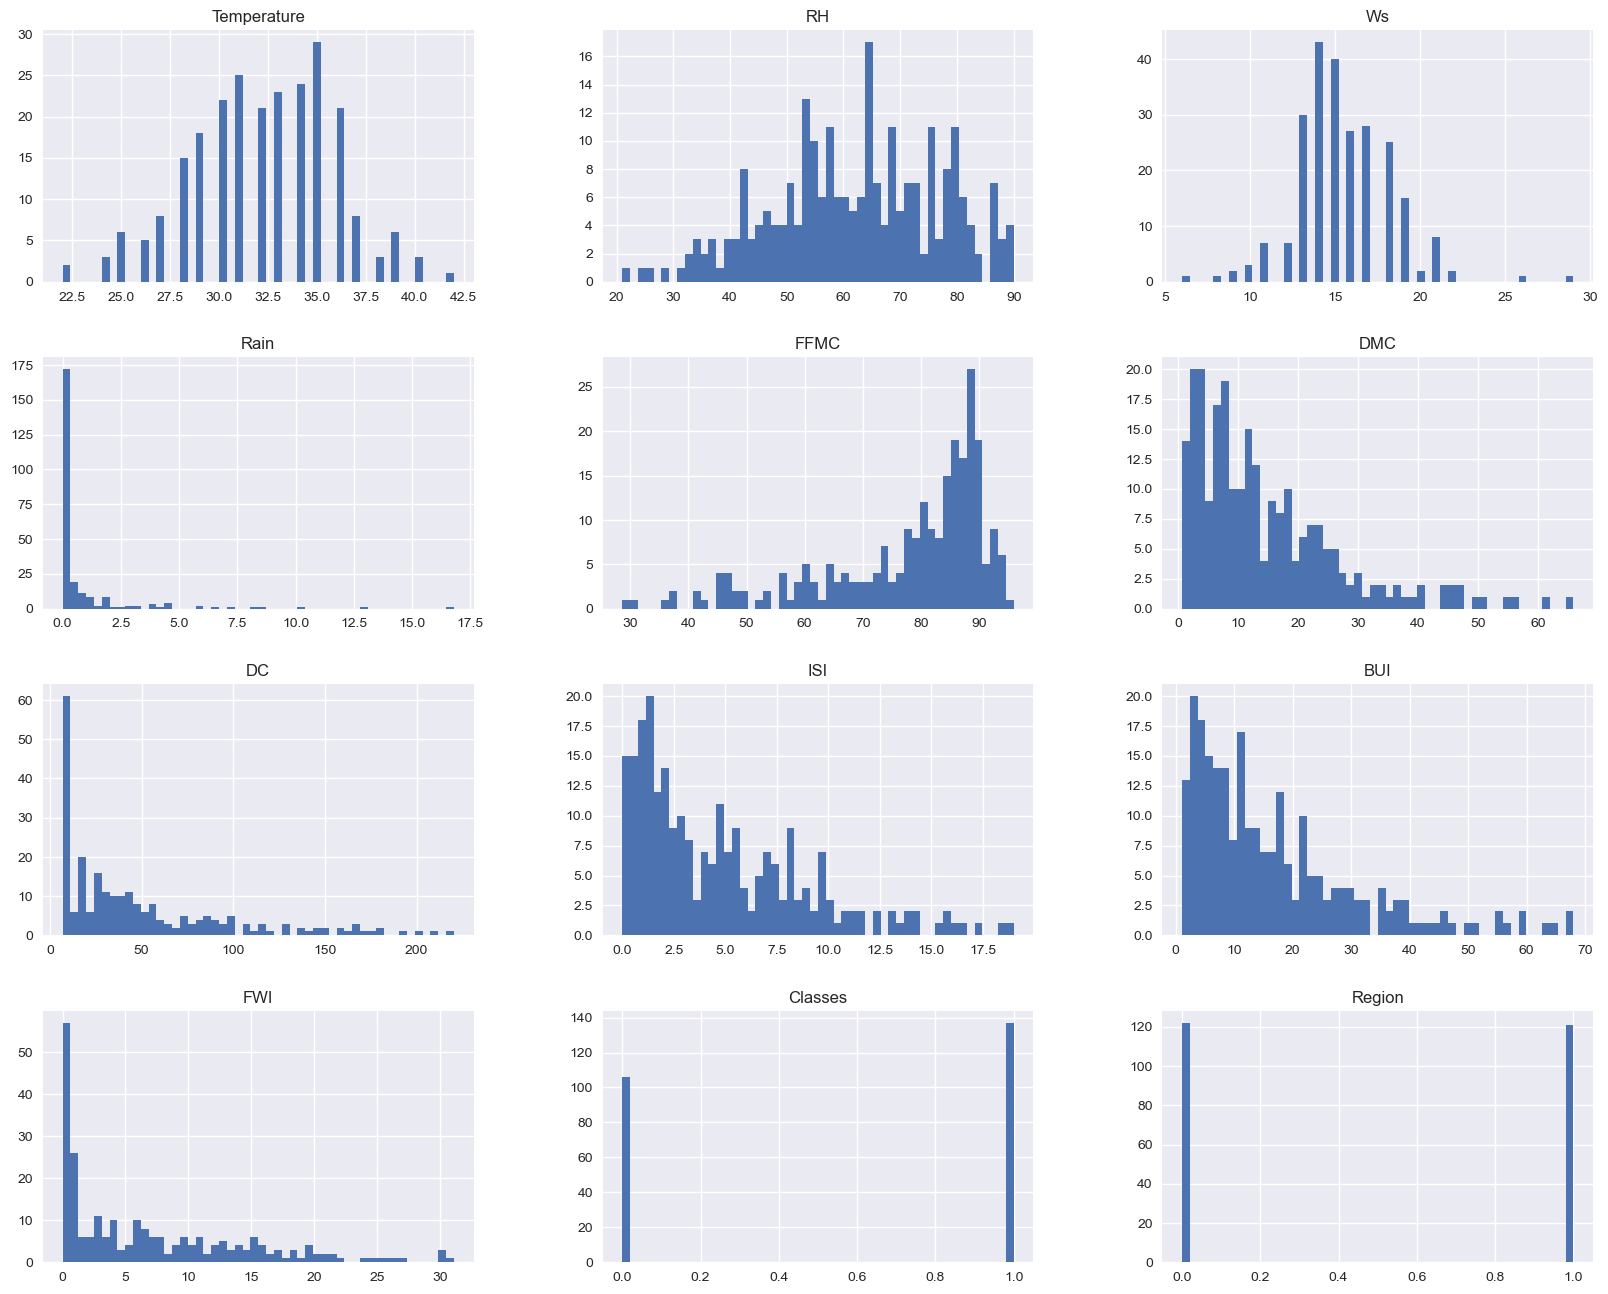

In [41]:
data_copy.hist(bins=50, figsize=(20,16))

/Users/siddanthapusandeep/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 2000x2000 with 0 Axes>

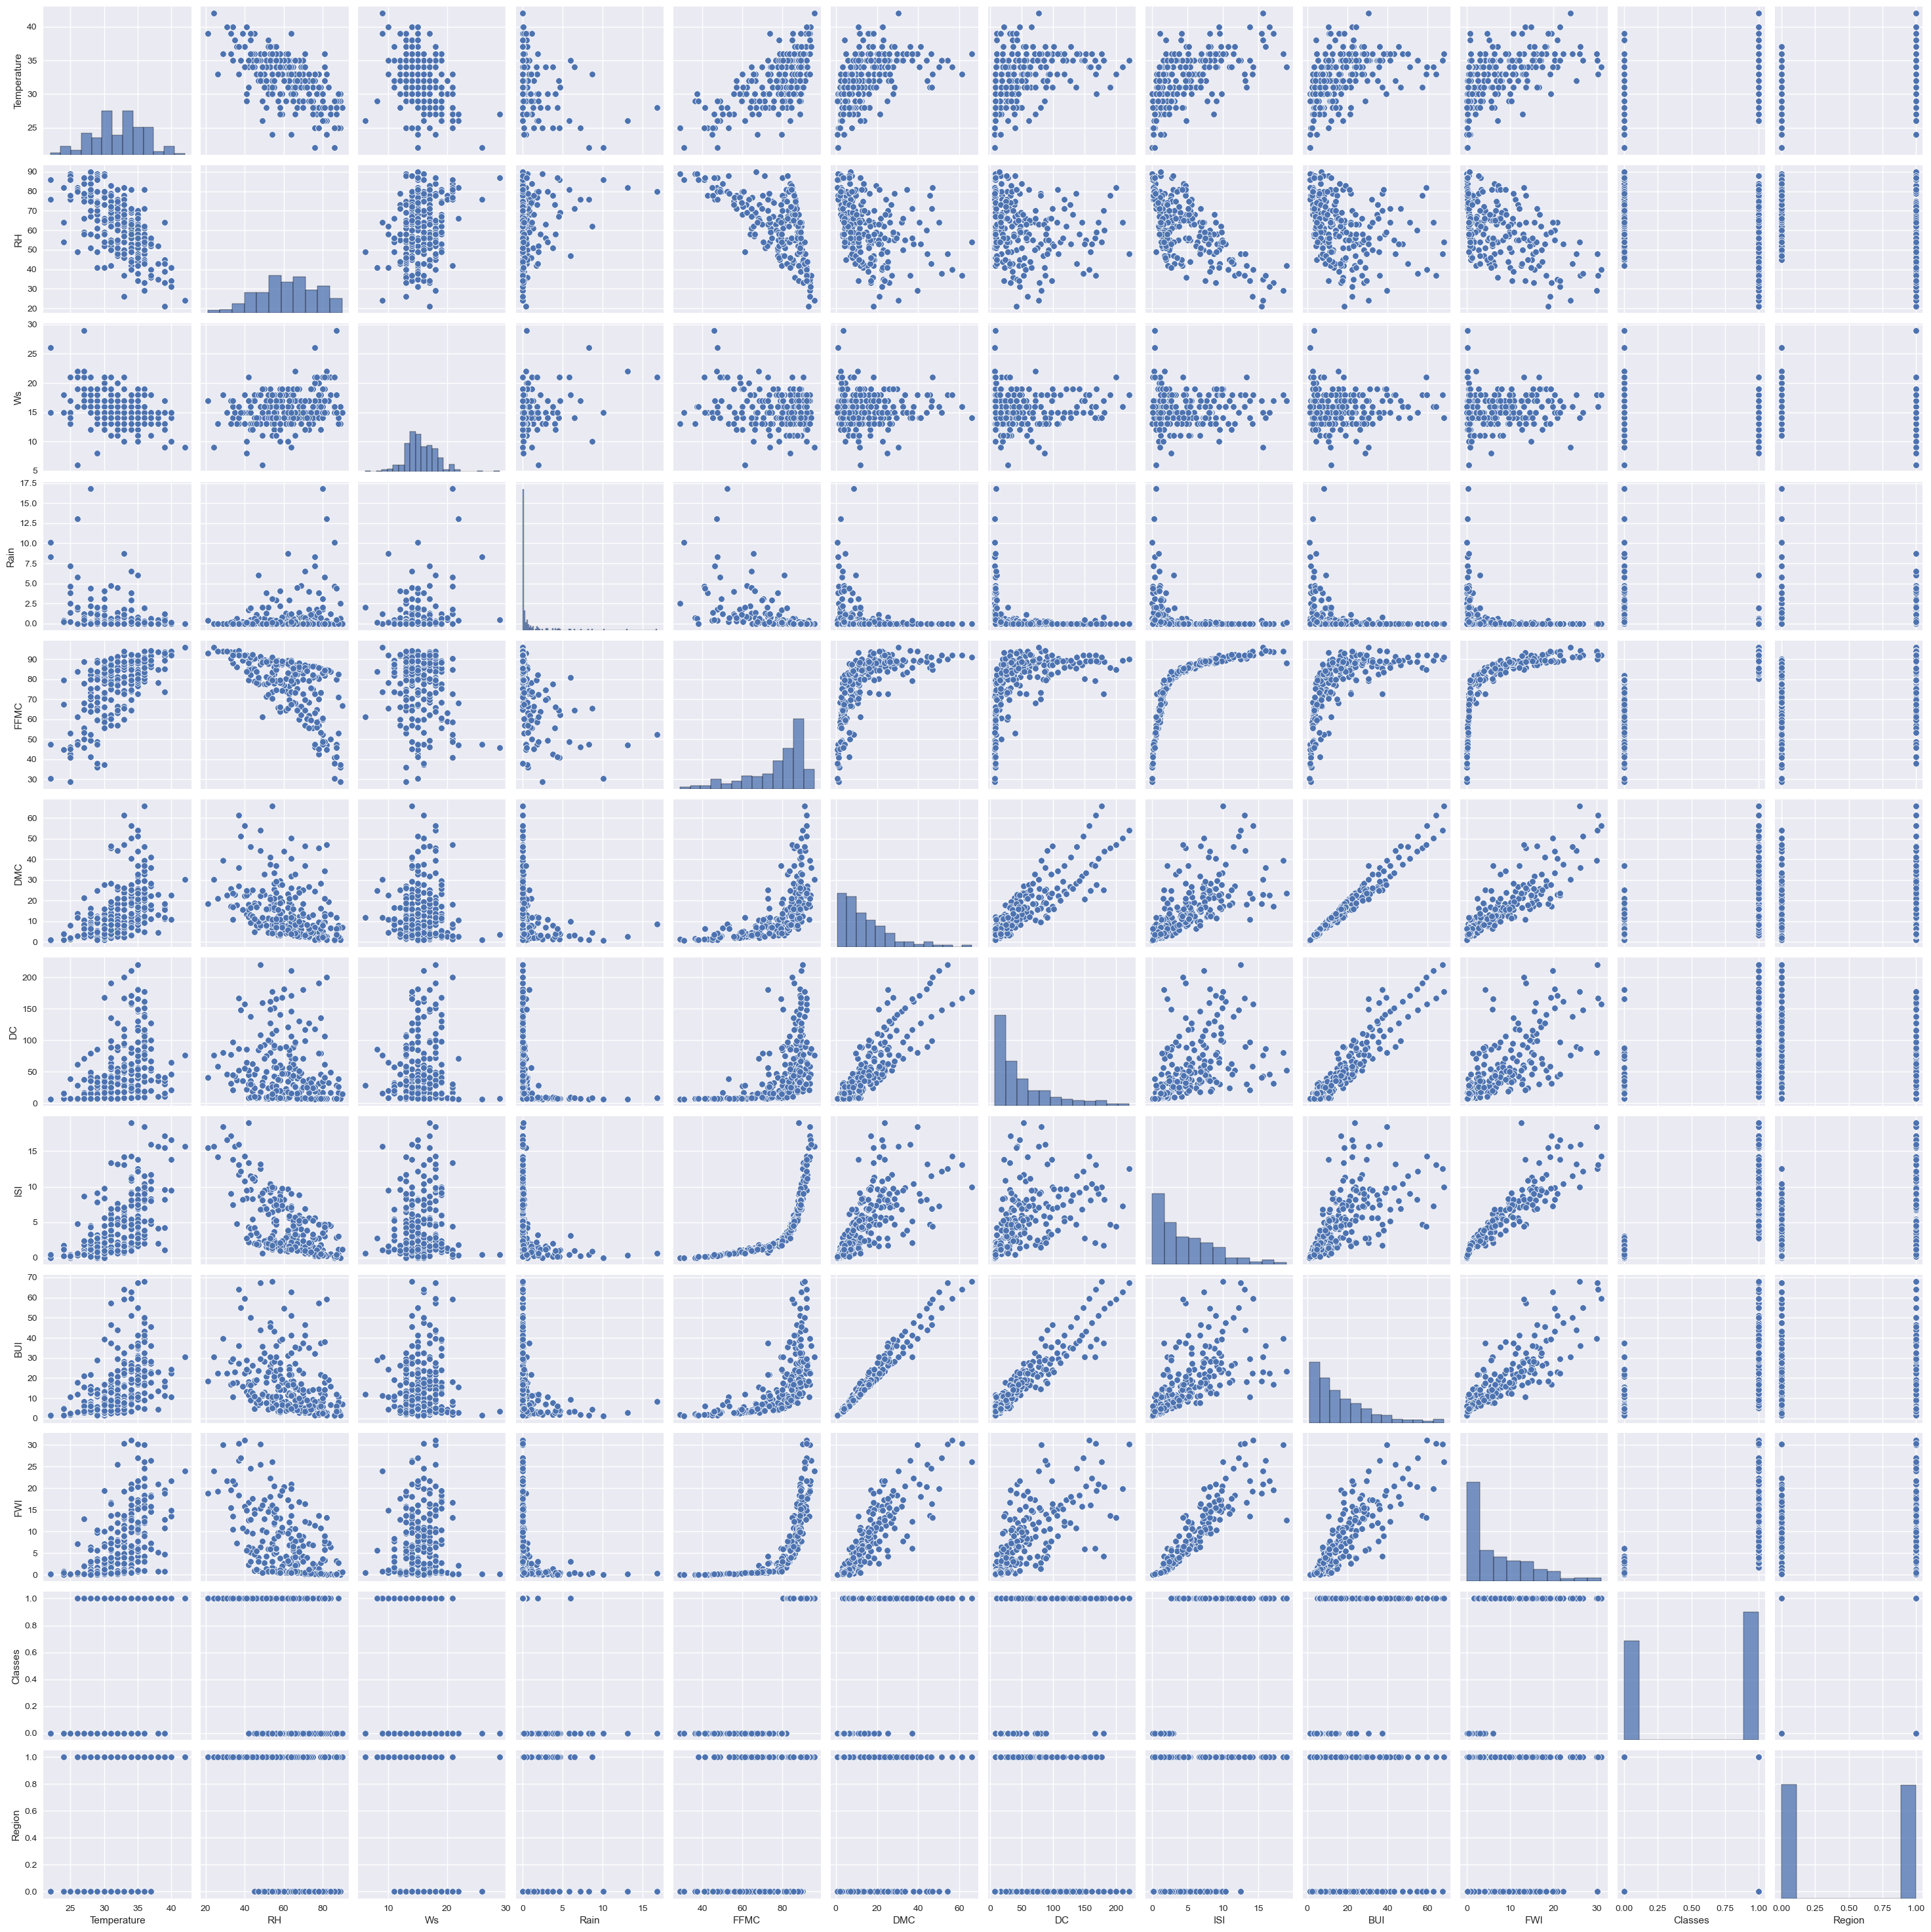

<Figure size 2000x2000 with 0 Axes>

In [42]:


sns.pairplot(data_copy)
plt.figure(figsize=(20,20))


In [43]:
## Percentage of Pie Chart

Percentage=data_copy['Classes'].value_counts(normalize=True)*100

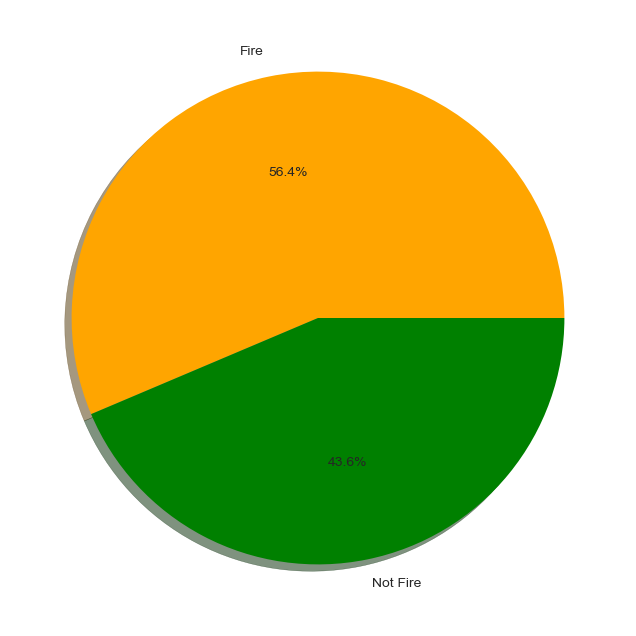

In [44]:
## Plotting Pie Charts

labels=['Fire', 'Not Fire']
plt.figure(figsize=(10,8))

plt.pie(Percentage, labels=labels, autopct='%1.1f%%', colors=['orange', 'green'], shadow=True)

plt.show()

In [45]:
corr=data_copy.corr()

<Axes: >

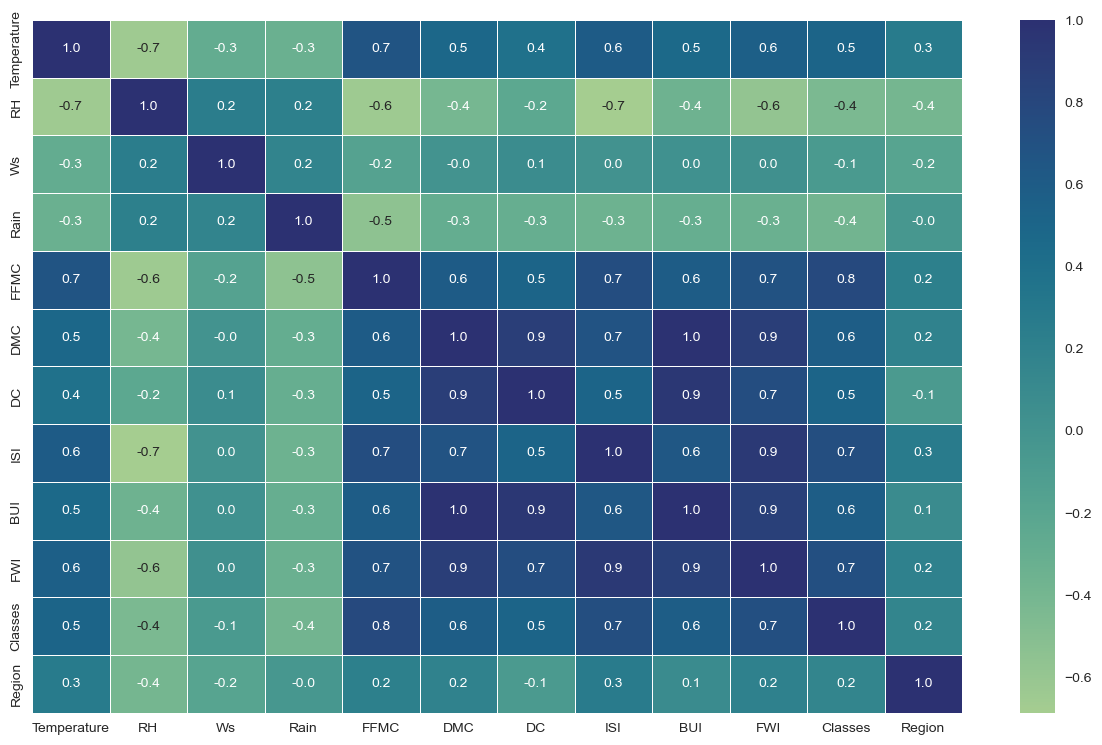

In [46]:
plt.figure(figsize=(15,9))

sns.heatmap(corr, annot=True, fmt='.1f', linewidth=.5, cmap='crest')

<Axes: >

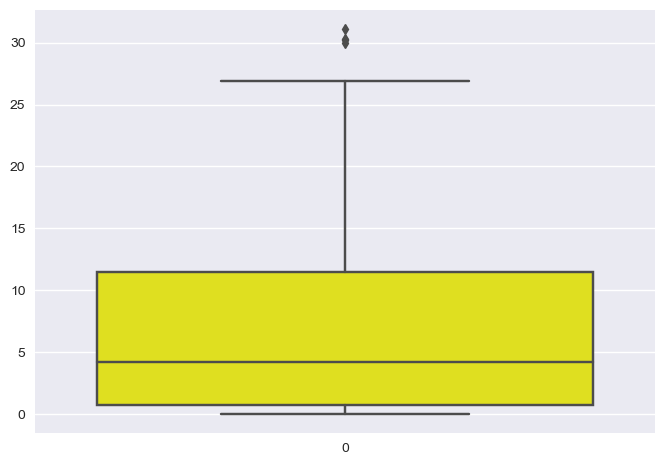

In [47]:
sns.boxplot(data_copy['FWI'], color='yellow')

Text(0.5, 1.0, 'Monthly Fire Analysis of Sidi-Bel Region')

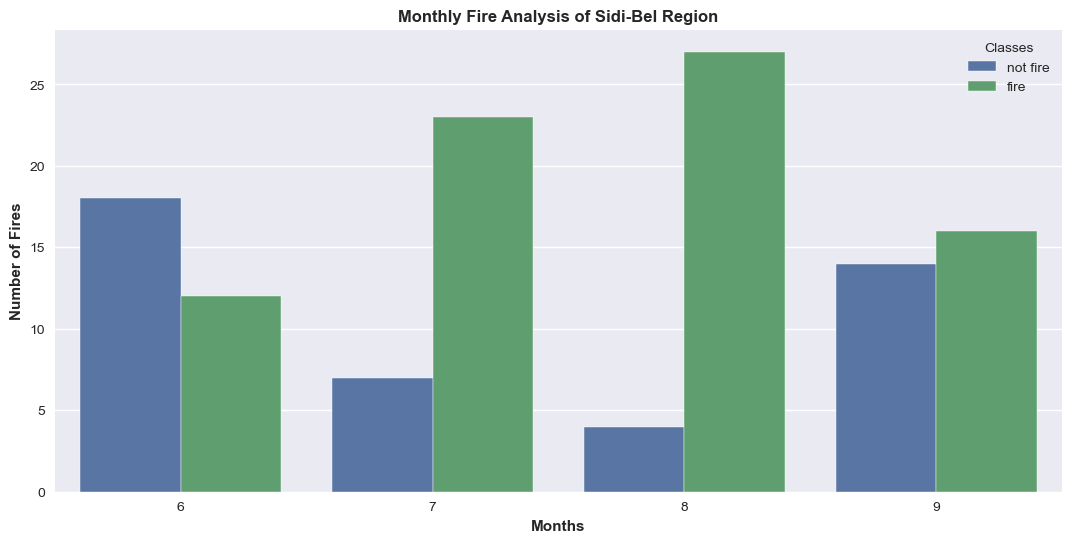

In [48]:
# Monthly Fire Analysis

dftemp1=data.loc[data['Region']==1]
plt.subplots(figsize=(13,6))

sns.set_style('whitegrid')
sns.countplot(x='month', hue='Classes', data=dftemp1)
plt.ylabel("Number of Fires", weight='bold')
plt.xlabel('Months', weight='bold')
plt.title("Monthly Fire Analysis of Sidi-Bel Region", weight='bold')

Text(0.5, 1.0, 'Monthly Fire Analysis of Brjia Region')

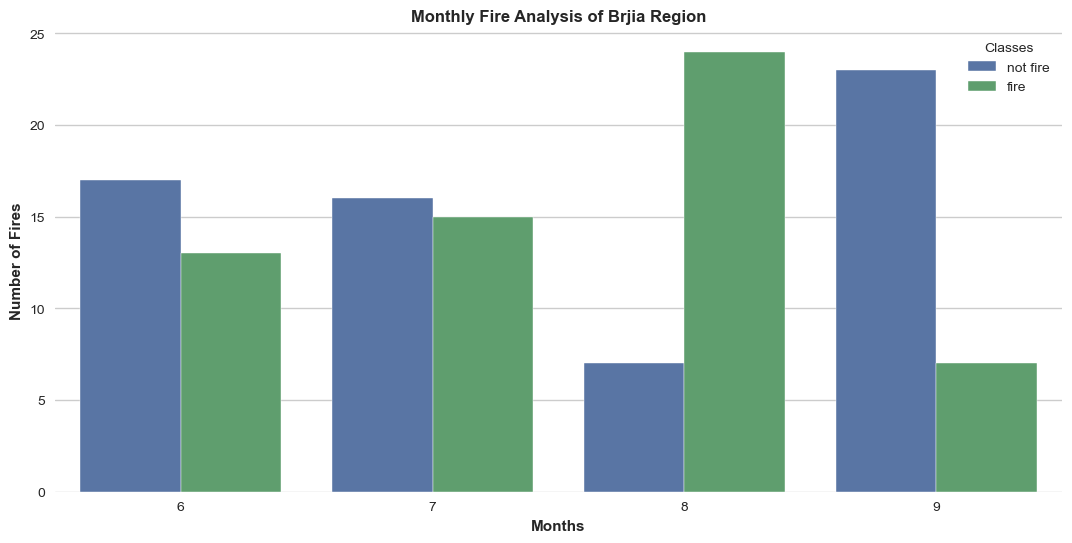

In [49]:
dftemp2=data.loc[data['Region']==0]
plt.subplots(figsize=(13,6))

sns.set_style('whitegrid')
sns.countplot(x='month', hue='Classes', data=dftemp2)
plt.ylabel("Number of Fires", weight='bold')
plt.xlabel('Months', weight='bold')
plt.title("Monthly Fire Analysis of Brjia Region", weight='bold')

In [50]:
# Independent and Dependent features

X=data_copy.drop('FWI', axis=1)
y=data['FWI']

In [51]:
X

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0
...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0,1


In [52]:
y

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
238    6.5
239    0.0
240    0.2
241    0.7
242    0.5
Name: FWI, Length: 243, dtype: float64

In [53]:
# Train Test Split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3, random_state=42)

In [54]:
X_train.shape

(170, 11)

In [55]:
X_test.shape

(73, 11)

In [56]:
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.640179,-0.295442,-0.303129,0.682819,0.495974,0.399434,0.608042,0.474804,0.528734,0.238873
RH,-0.640179,1.000000,0.201762,0.226259,-0.640759,-0.421517,-0.253547,-0.715106,-0.373155,-0.443073,-0.394121
Ws,-0.295442,0.201762,1.000000,0.244784,-0.169620,0.009523,0.092367,-0.004035,0.040699,-0.062718,-0.182236
Rain,-0.303129,0.226259,0.244784,1.000000,-0.536790,-0.288856,-0.304328,-0.341902,-0.300998,-0.367767,-0.051964
FFMC,0.682819,-0.640759,-0.169620,-0.536790,1.000000,0.625593,0.533040,0.748574,0.613526,0.781730,0.251710
DMC,0.495974,-0.421517,0.009523,-0.288856,0.625593,1.000000,0.870419,0.692435,0.983426,0.619536,0.210853
DC,0.399434,-0.253547,0.092367,-0.304328,0.533040,0.870419,1.000000,0.524898,0.943125,0.551208,-0.056844
ISI,0.608042,-0.715106,-0.004035,-0.341902,0.748574,0.692435,0.524898,1.000000,0.652179,0.737184,0.290294
BUI,0.474804,-0.373155,0.040699,-0.300998,0.613526,0.983426,0.943125,0.652179,1.000000,0.616406,0.115434
Classes,0.528734,-0.443073,-0.062718,-0.367767,0.781730,0.619536,0.551208,0.737184,0.616406,1.000000,0.177257


<Axes: >

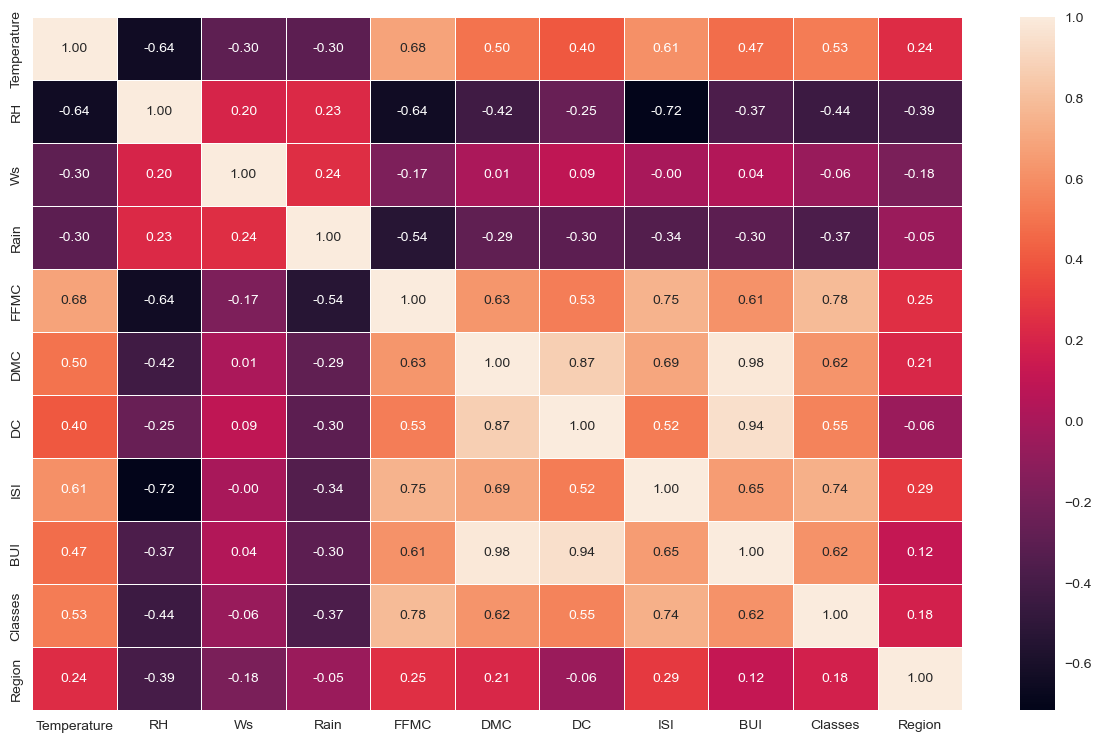

In [57]:
# Checking MultuCollinearity

plt.figure(figsize=(15,9))

sns.heatmap(X_train.corr(), annot=True, fmt='.2f', linewidth=.5)

In [58]:
def correlation(dataset, threshold):
    col_corr=set()
    
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]>threshold):
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
                
                
    return col_corr

In [59]:
correlation(X_train, 0.85)

{'BUI', 'DC'}

In [60]:
## Drop features when correlation is more than 85

In [61]:
X_train.drop(columns=['BUI', 'DC'], axis=1, inplace=True)
X_test.drop(columns=['BUI', 'DC'], axis=1, inplace=True)

In [62]:
X_train.shape

(170, 9)

In [63]:
X_test.shape

(73, 9)

## Feature Scaling & Standardization

In [64]:
from sklearn.preprocessing import StandardScaler

In [65]:
scaler=StandardScaler()

In [66]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [67]:
X_train_scaled

array([[ 0.26131696, -0.86261203, -0.59170487, ...,  0.57277215,
         0.90992142, -1.        ],
       [-1.64645715,  1.16565969,  0.17323679, ..., -1.03570698,
        -1.098996  , -1.        ],
       [-0.0112222 , -0.5921758 , -1.73911734, ..., -0.82590535,
        -1.098996  , -1.        ],
       ...,
       [-1.91899631,  0.89522346,  0.55570761, ..., -1.05901827,
        -1.098996  , -1.        ],
       [ 0.53385612, -0.25413052,  0.17323679, ...,  0.61939473,
         0.90992142,  1.        ],
       [-0.55630052,  0.96283252,  2.08559091, ..., -0.84921665,
        -1.098996  , -1.        ]])

In [68]:
X_test_scaled

array([[-2.83761359e-01,  8.39147711e-02, -2.09234040e-01,
        -3.85823876e-01,  6.47089705e-01, -5.89987708e-02,
         2.23102774e-01,  9.09921419e-01, -1.00000000e+00],
       [ 2.61316957e-01, -5.92175802e-01, -9.74175691e-01,
        -3.85823876e-01,  7.52243844e-01, -3.92549439e-01,
         3.86281817e-01,  9.09921419e-01, -1.00000000e+00],
       [-1.10137883e+00, -3.21739572e-01,  9.38178437e-01,
         6.21141440e-01, -9.65273758e-01, -9.12267923e-01,
        -8.25905354e-01, -1.09899600e+00,  1.00000000e+00],
       [ 5.33856115e-01, -3.21739572e-01, -9.74175691e-01,
        -2.94281575e-01,  1.42349838e-01,  2.90065882e-01,
        -6.16103728e-01, -1.09899600e+00,  1.00000000e+00],
       [-5.56300516e-01,  1.51523828e-01, -5.91704866e-01,
        -3.85823876e-01,  5.55956118e-01,  8.06270905e-02,
        -5.66327264e-02,  9.09921419e-01,  1.00000000e+00],
       [ 1.89655190e+00,  8.39147711e-02, -2.50405899e+00,
         1.63429932e-01, -2.57235889e-01, -2.529235

## Box Plot to understand effect of Standard Scaler

/var/folders/rc/76flhrzn4pgf33r81dt4lky00000gn/T/ipykernel_2022/4245392904.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


Text(0.5, 1.0, 'X _train after scaling')

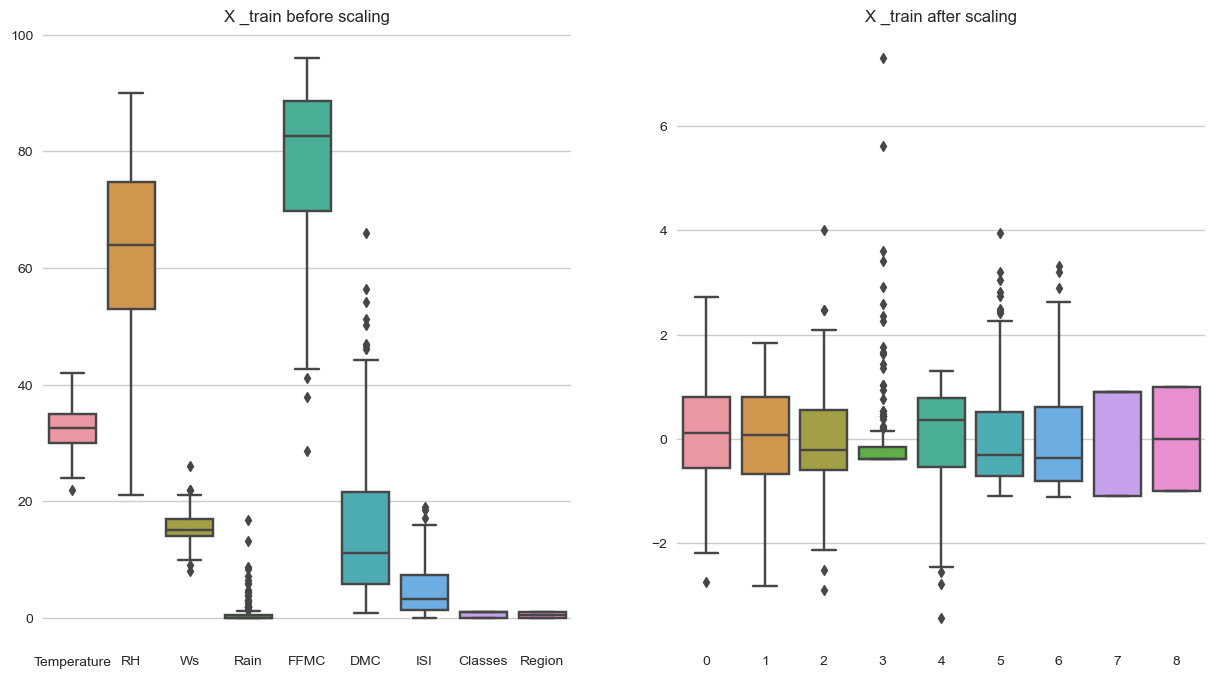

In [69]:
plt.subplots(figsize=(15,8))
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.title("X _train before scaling")

plt.subplot(1,2,2)
sns.boxplot(data=X_train_scaled)
plt.title("X _train after scaling")

## Linear Regression Model

In [70]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [71]:
LR=LinearRegression()

In [72]:
LR.fit(X_train_scaled, y_train)

LinearRegression()

In [73]:
y_pred=LR.predict(X_test_scaled)

In [74]:
mae=mean_absolute_error(y_test, y_pred)
r2=r2_score(y_test, y_pred)

print("Mean Absolute Error : ",mae)
print("R2 Score : ",r2)

Mean Absolute Error :  0.5648036371485086
R2 Score :  0.9847206874554417


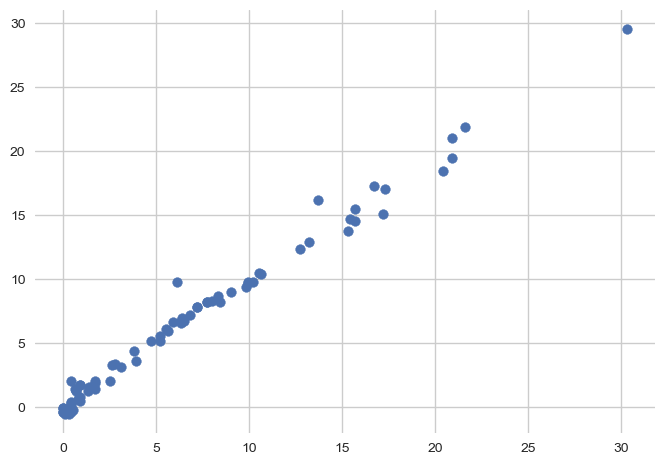

In [75]:
plt.scatter(y_test, y_pred)

## Ridge & Lasso

In [76]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

In [77]:
lasso=Lasso()
ridge=Ridge()

In [78]:
lasso.fit(X_train_scaled, y_train)
y_pred=lasso.predict(X_test_scaled)

mae=mean_absolute_error(y_test, y_pred)
r2=r2_score(y_test, y_pred)

print("Mean Absolute Error : ",mae)
print("R2 Score : ",r2)



Mean Absolute Error :  1.120336888239321
R2 Score :  0.9511364350928344


## Cross Validation for Lasso

In [79]:
from sklearn.linear_model import LassoCV

In [80]:
lassocv=LassoCV(cv=5)

In [81]:
lassocv.fit(X_train_scaled, y_train)

LassoCV(cv=5)

In [82]:
lassocv.alpha_

0.061776031206820514

In [83]:
lassocv.alphas_

array([7.1027424 , 6.62404134, 6.17760312, 5.76125335, 5.37296415,
       5.01084435, 4.67313021, 4.35817688, 4.06445034, 3.79051999,
       3.53505163, 3.29680098, 3.07460763, 2.86738937, 2.67413692,
       2.49390904, 2.32582792, 2.1690749 , 2.02288651, 1.88655073,
       1.75940353, 1.64082562, 1.53023946, 1.42710644, 1.33092425,
       1.24122441, 1.15757004, 1.07955369, 1.00679538, 0.93894074,
       0.87565928, 0.81664278, 0.76160379, 0.71027424, 0.66240413,
       0.61776031, 0.57612533, 0.53729642, 0.50108444, 0.46731302,
       0.43581769, 0.40644503, 0.379052  , 0.35350516, 0.3296801 ,
       0.30746076, 0.28673894, 0.26741369, 0.2493909 , 0.23258279,
       0.21690749, 0.20228865, 0.18865507, 0.17594035, 0.16408256,
       0.15302395, 0.14271064, 0.13309242, 0.12412244, 0.115757  ,
       0.10795537, 0.10067954, 0.09389407, 0.08756593, 0.08166428,
       0.07616038, 0.07102742, 0.06624041, 0.06177603, 0.05761253,
       0.05372964, 0.05010844, 0.0467313 , 0.04358177, 0.04064

In [84]:
lassocv.get_params()

{'alphas': None,
 'copy_X': True,
 'cv': 5,
 'eps': 0.001,
 'fit_intercept': True,
 'max_iter': 1000,
 'n_alphas': 100,
 'n_jobs': None,
 'positive': False,
 'precompute': 'auto',
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'verbose': False}

In [85]:
lassocv.mse_path_

array([[50.65386968, 76.54197718, 42.60540011, 85.19903601, 37.22447771],
       [44.75111814, 74.82132255, 38.341692  , 85.19903601, 33.05643554],
       [39.36934038, 67.35349762, 32.91718118, 77.16947646, 28.98441557],
       [34.66809152, 60.76849885, 28.30179163, 70.00628728, 25.07891899],
       [30.56005987, 54.39656706, 24.38332378, 63.69553448, 21.70030699],
       [26.96916466, 47.86216351, 21.06462063, 58.13161794, 18.77862509],
       [23.82945553, 42.15575307, 18.26138649, 53.22232605, 16.25301222],
       [21.08318369, 37.17090521, 15.90095328, 46.89293347, 14.07124316],
       [18.68014904, 32.81473426, 13.92043855, 41.32635877, 12.18732916],
       [16.57661964, 29.00744813, 12.26540003, 36.4658746 , 10.56155236],
       [14.73438066, 25.67846082, 10.88893934, 32.22081976,  9.15943046],
       [13.12047322, 22.76665973,  9.75047302, 28.5122238 ,  7.95103045],
       [11.70583482, 20.21881242,  8.81511714, 25.27132199,  6.9102242 ],
       [10.46524798, 17.98854548,  8.0

In [86]:

y_pred=lassocv.predict(X_test_scaled)

mae=mean_absolute_error(y_test, y_pred)
r2=r2_score(y_test, y_pred)

print("Mean Absolute Error : ",mae)
print("R2 Score : ",r2)

Mean Absolute Error :  0.6356015744517415
R2 Score :  0.9821627684487946


In [87]:
ridge.fit(X_train_scaled, y_train)
y_pred=ridge.predict(X_test_scaled)

mae=mean_absolute_error(y_test, y_pred)
r2=r2_score(y_test, y_pred)

print("Mean Absolute Error : ",mae)
print("R2 Score : ",r2)


Mean Absolute Error :  0.5844876727578043
R2 Score :  0.9841610358272455


## Cross Validation for Ridge

In [88]:
from sklearn.linear_model import RidgeCV

In [89]:
ridgecv=RidgeCV(cv=5)

In [90]:
ridgecv.fit(X_train_scaled, y_train)

RidgeCV(cv=5)

In [91]:
ridgecv.alpha_

10.0

In [92]:
ridgecv.alphas

(0.1, 1.0, 10.0)

In [93]:
ridgecv.get_params()

{'alpha_per_target': False,
 'alphas': (0.1, 1.0, 10.0),
 'cv': 5,
 'fit_intercept': True,
 'gcv_mode': None,
 'scoring': None,
 'store_cv_values': False}

In [94]:
y_pred=ridgecv.predict(X_test_scaled)

mae=mean_absolute_error(y_test, y_pred)
r2=r2_score(y_test, y_pred)

print("Mean Absolute Error : ",mae)
print("R2 Score : ",r2)

Mean Absolute Error :  0.7943132619521917
R2 Score :  0.976223192919533


## ElasticNet Regression

In [95]:
from sklearn.linear_model import ElasticNet

In [96]:
Elastic=ElasticNet()

In [97]:
Elastic.fit(X_train_scaled, y_train)
y_pred=Elastic.predict(X_test_scaled)

mae=mean_absolute_error(y_test, y_pred)
r2=r2_score(y_test, y_pred)

print("Mean Absolute Error : ",mae)
print("R2 Score : ",r2)

Mean Absolute Error :  1.8554687479717555
R2 Score :  0.8804077479376988


## Cross Validation for ElasticNet

In [98]:
from sklearn.linear_model import ElasticNetCV

In [99]:
ElasticCv=ElasticNetCV(cv=5)

In [100]:
ElasticCv.fit(X_train_scaled, y_train)

ElasticNetCV(cv=5)

In [101]:
ElasticCv.alpha_

0.04987818082990675

In [102]:
ElasticCv.get_params()

{'alphas': None,
 'copy_X': True,
 'cv': 5,
 'eps': 0.001,
 'fit_intercept': True,
 'l1_ratio': 0.5,
 'max_iter': 1000,
 'n_alphas': 100,
 'n_jobs': None,
 'positive': False,
 'precompute': 'auto',
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'verbose': 0}

In [103]:
y_pred=ElasticCv.predict(X_test_scaled)

mae=mean_absolute_error(y_test, y_pred)
r2=r2_score(y_test, y_pred)

print("Mean Absolute Error : ",mae)
print("R2 Score : ",r2)

Mean Absolute Error :  0.6856401038998684
R2 Score :  0.9807402447693789


In [104]:
# Pickle the machine learning model and Preprocessing model

import pickle

In [105]:
pickle.dump(scaler, open('scaler.pkl','wb')) 

In [106]:
pickle.dump(ridge, open('ridge.pkl','wb'))